In [11]:
import numpy as np 
import sympy as sp
x = sp.Symbol('x')

def matrizTridiagonal(n):
    M = np.zeros((n, n), dtype=float)
    for i in range(len(M)):
        for j in range(len(M)):
            if i == j:
                M[i,j] = 1
            elif abs(i - j) == 1:
                M[i,j] = 1
    return M

def matrizTrianSuperior(n):
    M = np.zeros((n, n), dtype=float)
    for i in range(len(M)):
        for j in range(len(M)):
            if i -j <= 0:
                M[i,j] = 1
    return M

def nDiferenteZero(M):
    zeros = 0
    for i in range(np.shape(M)[0]):
        for j in range(np.shape(M)[1]):
            if M[i, j] > 10**-15:
                zeros = zeros +1
    return zeros

def mantissa(mant_bin):
    mant_dec = 0
    for d in range(len(mant_bin)):
        mant_dec += int(mant_bin[d]) / (2 ** (d + 1))
    mant_dec += 1
    return mant_dec

def digSig(x1, x):
    return round(abs(np.log10(abs((x1-x)/x1))))

def metodoDNewton(func_symb, x0, tolerancia, N):
    def valor(func_symb, k):
        return func_symb.subs('x', k).evalf()
    der_symb  = sp.diff(func_symb)
    x_novo  = x0
    x_velho = 0
    i=1
    while (abs(x_novo - x_velho) > tolerancia) and (i < N):
        x_velho = x_novo
        x_novo = x_velho - valor(func_symb, x_velho) / valor(der_symb, x_velho)
        i = i + 1
    return x_novo

### 1) Converta o número inteiro 3040 da base 10 para a base 8.

In [5]:
oct(3040)

'0o5740'

### 2) Considere a máquina em ponto flutuante $F(B,|E|,|M|,BIAS)=F(2,6,6,15)$. Converta a sequência de bits $(0|010100|011110)$ para decimal.

In [6]:
#"(0|00111000|10110100)"
#"(S|C|M)"
s2 = 0
C2 = int('010100', 2)
M2 = mantissa('011110')
bias2 = 15

((-1)**s2) * M2 * (2**(C2 - bias2))

47.0

### 3) Seja uma máquina com base 10, $|M|=20$, $|E|=10$ e arredondamento por corte. Considere $x=5.23456*10^{35}$. Forneça o expoente q tal que o número $y=10^q$ seja o menor número tal que o resultado $x+y$ seja diferente de $x$?

In [163]:
expoente3 = 35
M3 = 20
expoente3 - M3

15

### 4) Considere a função $f=sin(x)cos(x)$. Qual o número de condicionamento de $f$ em $x=17$.

In [34]:
num4 = 17
func4 = sp.sin(x)*sp.cos(x)
der4  = sp.diff(func4)
cond4 =abs(x*der4/func4)
display(sp.simplify(cond4))
display(cond4.subs(x, num4).evalf())

2*Abs(x/tan(2*x))

54.5309648180995

### 5) Encontre a raiz de $g(x)=exp(-x)-(85 x)/100$.

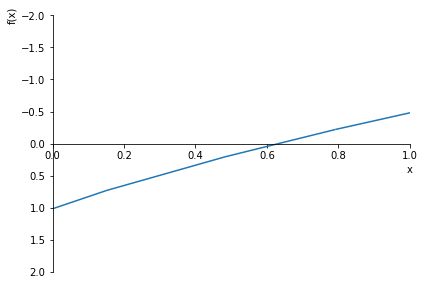

In [40]:
func_symb5 = sp.exp(-x) -85*x/100
sp.plot(func_symb5, xlim=(0, 1), ylim =(2, -2))

In [41]:
metodoDNewton(func_symb5, 0.6, 10**-15,1000)

0.627897412016882

### 6) Considere as curvas $a(x)=ln(x+50)$ e $b(x)=x$. Encontre a coordenada $x$ da intersecção entre as curvas $a(x)$ e $b(x)$.

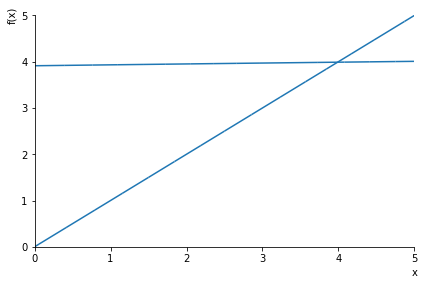

In [53]:
a6 = sp.ln(x+50)
b6 = x
sp.plot(a6, b6, ylim =(0, 5), xlim =(0, 5))

In [55]:
metodoDNewton(a6 - b6, 4, 10**-15, 1000)

3.98877617637512

### 7) Encontre a coordenada $x$ do ponto de mínimo de $f(x)=exp(-x)+x/24$ .

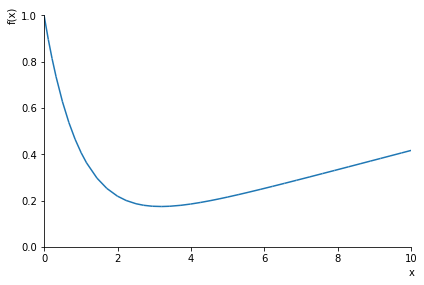

In [61]:
f7 = sp.exp(-x) + x/24
df7 =f7.diff()
sp.plot(f7, xlim=(0, 10), ylim=(0,1))

In [62]:
metodoDNewton(df7, 2.5, 10**-15, 1000)

3.17805383034795

### 8) Lembrando que operações no Scilab iniciando com ponto são elemento-a-elemento, quantos flops $(+,-,*,/)$ são necessários para calcular $1+(x+3*(x+4*x.*x))$ onde $x$ é um vetor com $43140$ componentes?

In [63]:
6 * 43140

258840

### 9) Considere as matrizes $X$ e $L$ de tamanho $4655$ por $4655$, tal que $X$ seja tridiagonal e $L$ seja triangular superior. Considere o vetor de matrizes por blocos $V=\begin{bmatrix} X & L & L^T & X^T \end{bmatrix}$. Quantos elementos diferentes de zero possui a matriz $V$ ?

In [12]:
N = 4655
X = matrizTridiagonal(N)
L = matrizTrianSuperior(N)

V=np.array([*X, *L, *np.transpose(L), *np.transpose(X)])
nDiferenteZero(V)

21701606

### 10) Construa no Scilab uma matriz tridiagonal de tamanho $n x n$ tal que <br>$M_{i,j}=-2$, se $i=j$; <br>M_{i,j}=1 se |i-j|=1 <br>e um vetor $b_i=-116/n^2$, $(n>10)$. <Br> Resolva o sistema Mx=b por qualquer método e estime o máximo de $x$ com dois dígitos significativos a medida que n cresce. <br>(Esse problema aproxima a equação de Laplace em uma barra aquecida uniformemente. O gráfico de $x$ deve ser uma parábola)

In [161]:
def criaMatriz(n):
    M = np.zeros((n, n), dtype=float)
    for i in range(len(M)):
        for j in range(len(M)):
            if i == j:
                M[i,j] = -2
            elif abs(i - j) == 1:
                M[i,j] = 1
    return M

def criaVetor(n):
    b = np.zeros(n, dtype=float)
    for i in range(n):
        b[i] = -116/n**2
    return b

n10 = 500
M10 = criaMatriz(n10)
b10 = criaVetor(n10)
x10 = np.linalg.solve(M10, b10)
np.linalg.norm(x10, np.inf)

14.558000000000968